In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

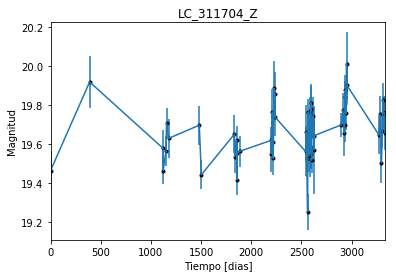

In [2]:
data = np.genfromtxt('LC_311704_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311704_Z')
plt.savefig("LC_311704_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

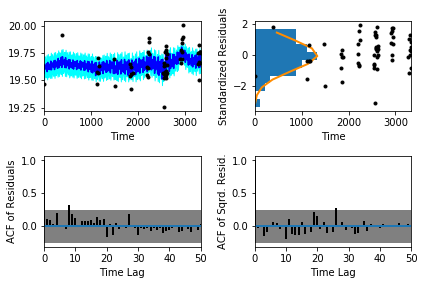

In [5]:
sample.assess_fit()

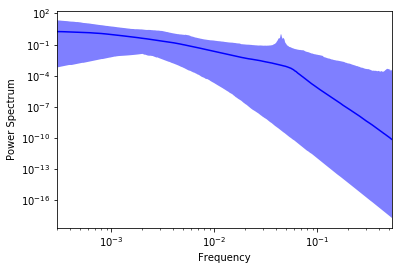

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

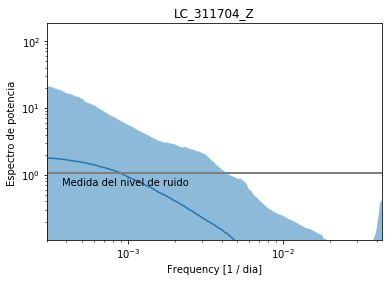

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311704_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311704_Z')

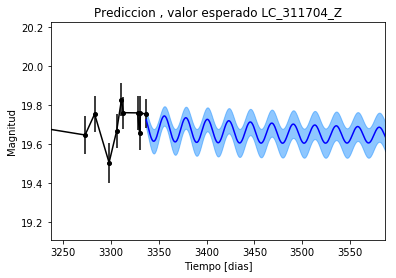

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311704_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311704_Z')

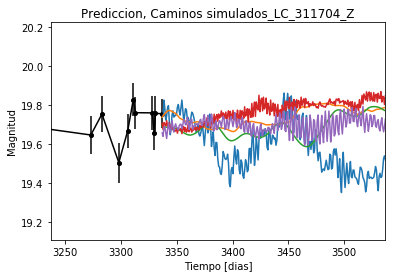

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311704_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


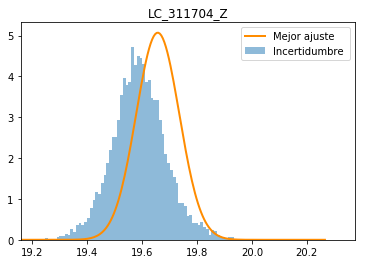

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311704_Z')
plt.savefig("Mejor_ajuste_LC_311704_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311704_Z')

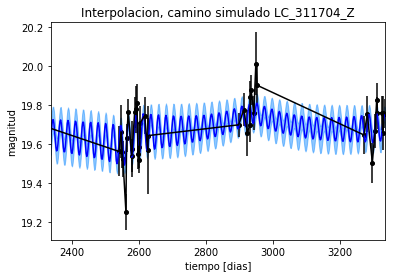

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_311704_Z')

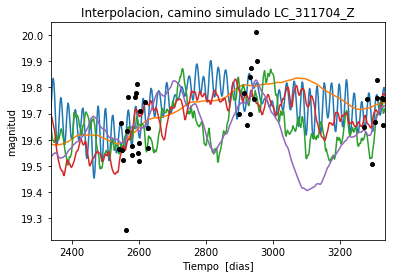

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 483.30284608
Median: 0.00372409637168
Standard deviation: 0.16137285774
68% credibility interval: [ 0.00063799  0.09405547]
95% credibility interval: [  3.40008485e-04   6.46773448e-01]
99% credibility interval: [  3.12949718e-04   9.64089571e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 326.292675501
Median: 0.00184701131064
Standard deviation: 0.0710193200247
68% credibility interval: [ 0.00052627  0.02245623]
95% credibility interval: [ 0.0003296   0.20480946]
99% credibility interval: [  3.05705480e-04   5.10242086e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 355.708962266
Median: 0.0526587282507
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 130.246760028
Median: 67.9785918856
Standard deviation: 2.35148177254
68% credibility interval: [ 66.17499981  70.80307364]
95% credibility interval: [ 63.62529354  73.19773301]
99% credibility interval: [ 61.84341116  74.01536982]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 264.969074218
Median: 0.764590255095
Standard deviation: 2.03350511337
68% credibility interval: [ 0.08822024  3.63379565]
95% credibility interval: [ 0.01795751  6.84376874]
99% credibility interval: [ 0.01046968  9.57035529]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 322.708935437
Median: 0.296195635264
Standard deviation: 9.88671797718
68% credibility interval: [ 0.06845337  9.96050244]
95% credibility interval: [  2.16860312e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 14515.048548
Median: 3.55356440208e-38
Standard deviation: 1.10714930683e+125
68% credibility interval: [  8.98554903e-87   1.58924253e+07]
95% credibility interval: [  6.06686257e-168   5.20212077e+117]
99% credibility interval: [  1.43986340e-238   2.13158352e+124]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1982.18493632
Median: 19.6486685525
Standard deviation: 0.0475782810384
68% credibility interval: [ 19.6085854   19.68536164]
95% credibility interval: [ 19.55169374  19.74148043]
99% credibility interval: [ 19.48153201  19.78925294]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 236.784824533
Median: 0.0448446694497
Standard deviation: 0.266832664361
68% credibility interval: [ 0.          0.45299109]
95% credibility interval: [ 0.          0.96014802]
99% credibility interval: [ 0.          1.04094802]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 236.784824533
Median: 0.0448446694497
Standard deviation: 0.266832664361
68% credibility interval: [ 0.          0.45299109]
95% credibility interval: [ 0.          0.96014802]
99% credibility interval: [ 0.          1.04094802]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 354.039898929
Median: 0.0
Standard deviation: 0.0101671008561
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 130.246760028
Median: 67.9785918856
Standard deviation: 2.35148177254
68% credibility interval: [ 66.17499981  70.80307364]
95% credibility interval: [ 63.62529354  73.19773301]
99% credibility interval: [ 61.84341116  74.01536982]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2139.66962624
Median: 0.0109295573302
Standard deviation: 0.0125126817654
68% credibility interval: [ 0.00587916  0.02073697]
95% credibility interval: [ 0.00293476  0.04377646]
99% credibility interval: [ 0.00171736  0.0784807 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 477.612730201
Median: 1.19260902178
Standard deviation: 0.224577919658
68% credibility interval: [ 0.97431575  1.42884511]
95% credibility interval: [ 0.79643222  1.67352754]
99% credibility interval: [ 0.70198468  1.8279727 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 410.948896078
Median: 0.000263977487567
Standard deviation: 0.290010386287
68% credibility interval: [  3.21536635e-10   1.03818409e-02]
95% credibility interval: [  6.43302122e-121   6.87367711e-001]
99% credibility interval: [  1.24179708e-125   2.01582116e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 483.30284608
Median: (-0.0233991876051-3.37783714398j)
Standard deviation: 1.95931510316
68% credibility interval: [-0.59096797+0.j         -0.00400861-0.67812955j]
95% credibility interval: [ -4.06379743e+00+0.j          -2.13633631e-03-0.27783141j]
99% credibility interval: [ -6.05755343e+00+0.j          -1.96632107e-03-0.00452634j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 326.292675501
Median: (-0.0116051143292+0.0461291928964j)
Standard deviation: 1.73492632715
68% credibility interval: [-0.14109666+1.16799846j -0.00330664+0.00249746j]
95% credibility interval: [-1.28685580+3.90478487j -0.00207094+0.j        ]
99% credibility interval: [ -3.20594558e+00 +3.40241613e+00j  -1.92080418e-03 +2.83040978e-03j]
Pos